## Multiple Input Linear Regression

The initial parameters: [Parameter containing:
tensor([[ 0.4493, -0.2372]], requires_grad=True), Parameter containing:
tensor([-0.6170], requires_grad=True)]
Calculated loss during each epoch:  [11.550737358629704, 1.7396494566928595, 0.1637741174781695, 0.07246367140032817, 0.06856350362068042, 0.06830079556675628, 0.06827061396325007, 0.06826662653475069, 0.0682660712627694, 0.06826609979907516, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143]


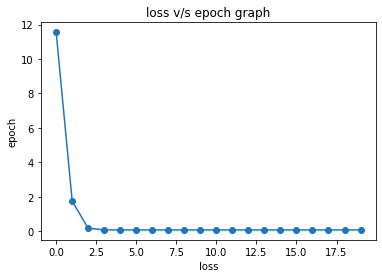

In [4]:
import torch
from torch import nn, optim

#set the random seed to 1

class LR(nn.Module):
    def __init__(self,input_size,output_size):
        super(LR,self).__init__()
        self.linear= nn.Linear(input_size, output_size)
    def forward(self,x):
        out= self.linear(x)
        return out

#to create synthetic data
from torch.utils.data import Dataset,DataLoader
class Data2D(Dataset):
    def __init__(self):
        self.x= torch.zeros(20,2)
        self.x[:,0]= torch.arange(-1,1,0.1)
        self.x[:,1]= torch.arange(-1,1,0.1)
        self.w= torch.tensor([[1.0],[1.0]])
        self.b= 1
        self.f= torch.mm(self.x, self.w)+self.b
        #torch.rand() generates numbers of mean 0 and standard deviation 1.
        # multiplying by 0.1 means, we are reducing the magnitude by 10 times, Inshort we are reducing the spread.
        self.y= self.f + 0.1*torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]
    
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
    

data_set= Data2D()
criterion= nn.MSELoss()
trainloader= DataLoader(dataset=data_set, batch_size=2)


model= LR(input_size=2, output_size=1)
print("The initial parameters:", list(model.parameters()))
optimizer= optim.SGD(model.parameters(), lr=0.1)

#training
LOSS= []
epochs= 30

def train_model(epochs):
    for epoch in range(epochs):
        total=0
        for x,y in trainloader:
            yhat= model(x)
            loss= criterion(yhat,y)
            optimizer.zero_grad()
            #calculates derivative of loss wrt each learnable parameter
            loss.backward()
            #update the parameters
            optimizer.step()
        
            total+= loss.item()
        LOSS.append(total)
        
        
train_model(epochs)


print("Calculated loss during each epoch: ",LOSS)
#show error reduced after each epoch
import matplotlib.pyplot as plt
%matplotlib inline

# Create a plot
plt.plot(LOSS[:20], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('loss')
plt.ylabel('epoch')
plt.title('loss v/s epoch graph')

# Display the plot
plt.show()

## Multiple output Linear Regression

We can represent M linear functions means M output with D input parameters like below:

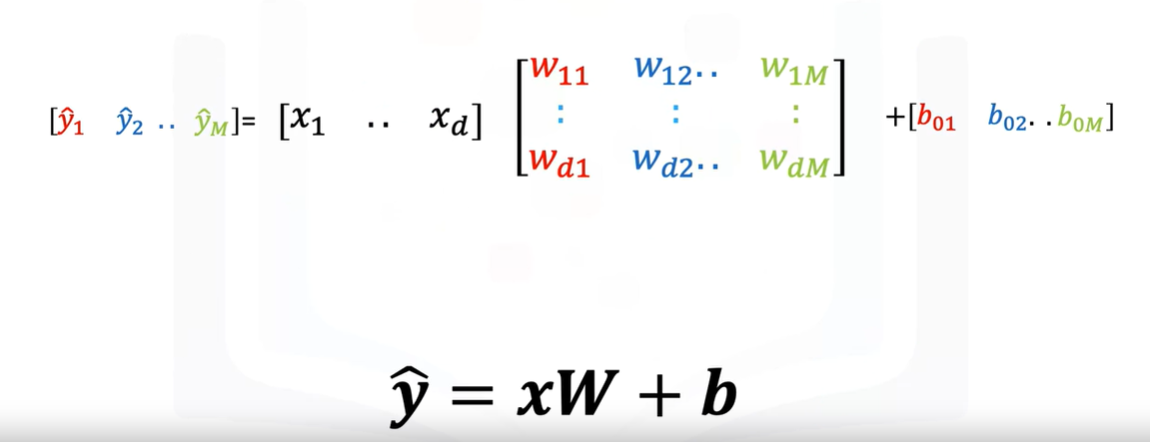

Calculated loss during each epoch:  [11.550737358629704, 1.7396494566928595, 0.1637741174781695, 0.07246367140032817, 0.06856350362068042, 0.06830079556675628, 0.06827061396325007, 0.06826662653475069, 0.0682660712627694, 0.06826609979907516, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 0.06826610387361143, 7.419457733631134, 6.986709743738174, 6.580371528863907, 6.1987574100494385, 5.84029358625412, 5.503512904047966, 5.187043160200119, 4.889604687690735, 4.610001355409622, 4.347115620970726, 4.099904388189316, 3.8673908412456512, 3.6486631631851196, 3.442868024110794, 3.2492081373929977, 3.06693671643734, 2.895355336368084, 2.7338110208

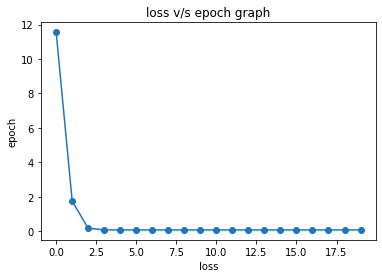

In [7]:
#set the seed manually
torch.manual_seed(1)

import torch.nn as nn
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR,self).__init__()
        self.linear= nn.Linear(input_size,output_size)
    
    def forward(self,x):
        out= self.linear(x)
        return out

#create dataset class
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.x= torch.zeros(20,2)
        self.x[:,0]= torch.arange(-1,1,0.1)
        self.x[:,1]= torch.arange(-1,1,0.1)
        self.w= torch.tensor([[1.0,-1.0],[1.0,3.0]])
        self.b= torch.tensor([1.0,-1.0])
        #here when we add bias to the result of matrix multiplication, then pytorch broadcasting will apply
        self.f= torch.mm(self.x,self.w)+self.b
        self.y= self.f + 0.002*torch.randn((self.x.shape[0],2))
        self.len= self.x.shape[0]
    
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len
    

data_set= Data2D()
criterion= nn.MSELoss()
trainloader= DataLoader(dataset= data_set, batch_size=5)
model= LR(input_size=2, output_size=2)
optimizer= optim.SGD(model.parameters(), lr=0.01)

#training
Loss= []
epochs= 50
for epoch in range(epochs):
    total=0
    for x,y in trainloader:
        yhat= model(x)
        loss= criterion(yhat,y)
        total+= loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    LOSS.append(total)

print("Calculated loss during each epoch: ",LOSS)
#show error reduced after each epoch
import matplotlib.pyplot as plt
%matplotlib inline

# Create a plot
plt.plot(LOSS[:20], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('loss')
plt.ylabel('epoch')
plt.title('loss v/s epoch graph')

# Display the plot
plt.show()


## Logistic Regression

### Two ways to create logistic function in pytorch

First way is by using the torch.nn module.

tensor([[4.5398e-05],
        [5.0172e-05],
        [5.5449e-05],
        [6.1280e-05],
        [6.7724e-05],
        [7.4846e-05],
        [8.2717e-05],
        [9.1416e-05],
        [1.0103e-04],
        [1.1165e-04],
        [1.2339e-04],
        [1.3637e-04],
        [1.5071e-04],
        [1.6656e-04],
        [1.8407e-04],
        [2.0343e-04],
        [2.2482e-04],
        [2.4846e-04],
        [2.7458e-04],
        [3.0345e-04],
        [3.3535e-04],
        [3.7061e-04],
        [4.0957e-04],
        [4.5262e-04],
        [5.0020e-04],
        [5.5278e-04],
        [6.1088e-04],
        [6.7508e-04],
        [7.4603e-04],
        [8.2442e-04],
        [9.1105e-04],
        [1.0068e-03],
        [1.1125e-03],
        [1.2294e-03],
        [1.3585e-03],
        [1.5012e-03],
        [1.6588e-03],
        [1.8329e-03],
        [2.0253e-03],
        [2.2378e-03],
        [2.4726e-03],
        [2.7320e-03],
        [3.0184e-03],
        [3.3348e-03],
        [3.6842e-03],
        [4

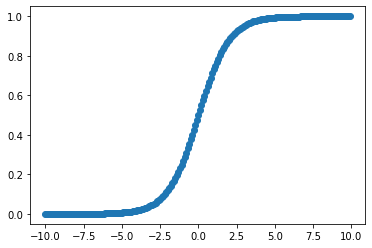

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline


#sample data
z= torch.arange(-10, 10, 0.1).view(-1,1)

#create sigmoid object
sig= nn.Sigmoid()
yhat= sig(z)
print(yhat)

# Create a plot
plt.plot(z, yhat, marker='o', linestyle='-')

# Display the plot
plt.show()



The second way of creating sigmoid function is by simply using torch module.

In [10]:
import torch
z= torch.arange(-100,100,0.1).view(-1,1)
yhat= torch.sigmoid(z)

### Create Logistic Regression using nn.Sequential package

In [ ]:
import torch
from torch import nn

model= nn.sequential(nn.Linear(1,1),nn.Sigmoid())

x= torch.tensor([[1.0]])
yhat= model(x)

### Create Logistic Regression using custom module

In [ ]:
import torch.nn as nn

class logistic_regression(nn.Module):
    def __int__(self,in_size,1):
        super(logistic_regression,self).__init__()
        self.linear= nn.Linear(in_size,1)
    def forward(self,x):
        x= torch.sigmoid(self.linear(x))
        return x

model= logistic_regression(1)

x= torch.tensor([[1.0]])
yhat= model(x)

## Multiple Input Logistic regression

In [ ]:
import torch
from torch import nn

model= nn.sequential(nn.Linear(2,1),nn.Sigmoid())

x= torch.tensor([[1.0,1.0],[1.0,2.0]])
yhat= model(x)

## Bernaulli distribution and Maximum Likelihood 

we can calculate liklihood of sequence of events by multiplying the probability of each individual event to obtain the likelihood.

we can describe probability of getting class A (y=0) or class B(y=1) by bernoulli distribution as: 
p(y|theta)= theta^y * (1-theta)^(1-y)
where theta is parameters of the model.

the cost function is will be made by combing both the events,
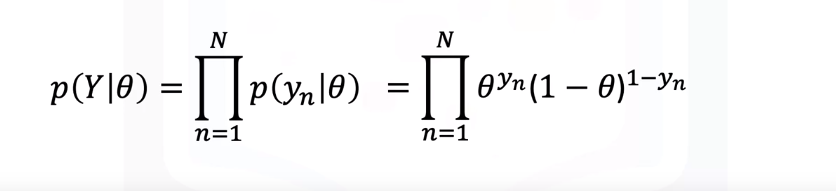

The best parameter value of theta will maximizes the liklihood.



it is usually difficult to maximize the likelihood function. The log of the liklihood function is much simpler to deal with.

as the log function is monotonically increasing, the location of the maximum value of the parameter remains in the same position.

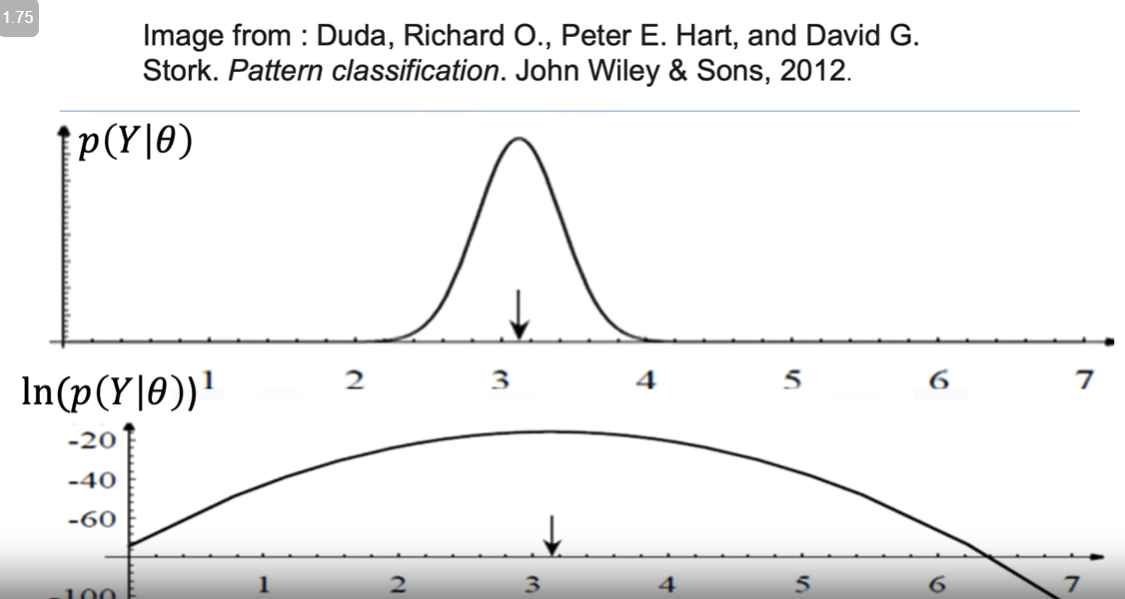


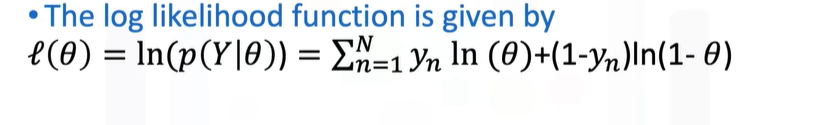

## Logistic Regression with Maximum Likelihood Function

 * Porblem with Mean Square Error
 * Maximum Likelihood
 * Logistic Regression Cross Entropy
 * Implement with PyTorch

Loss function for logistic regression will look something like this:
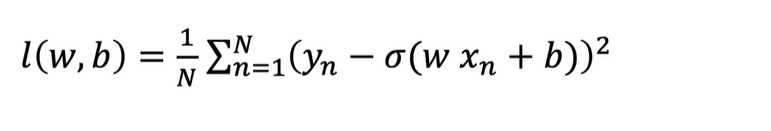

The cost  surface for logistic gression with squared loss is flat at most of the places. If we start random initialization in a good location, our algorithm will converge to a minimum. but, if we start our initialization in the bad region nothing will happen.
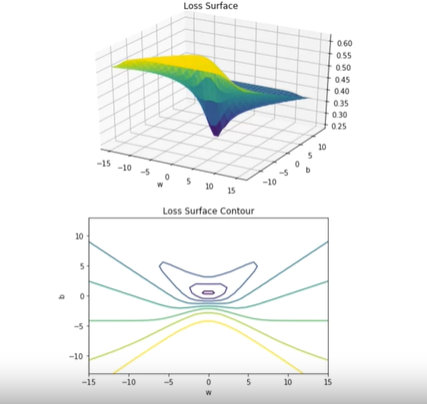

if we use maximum likihood as cost function. then we can calculate it as given below:
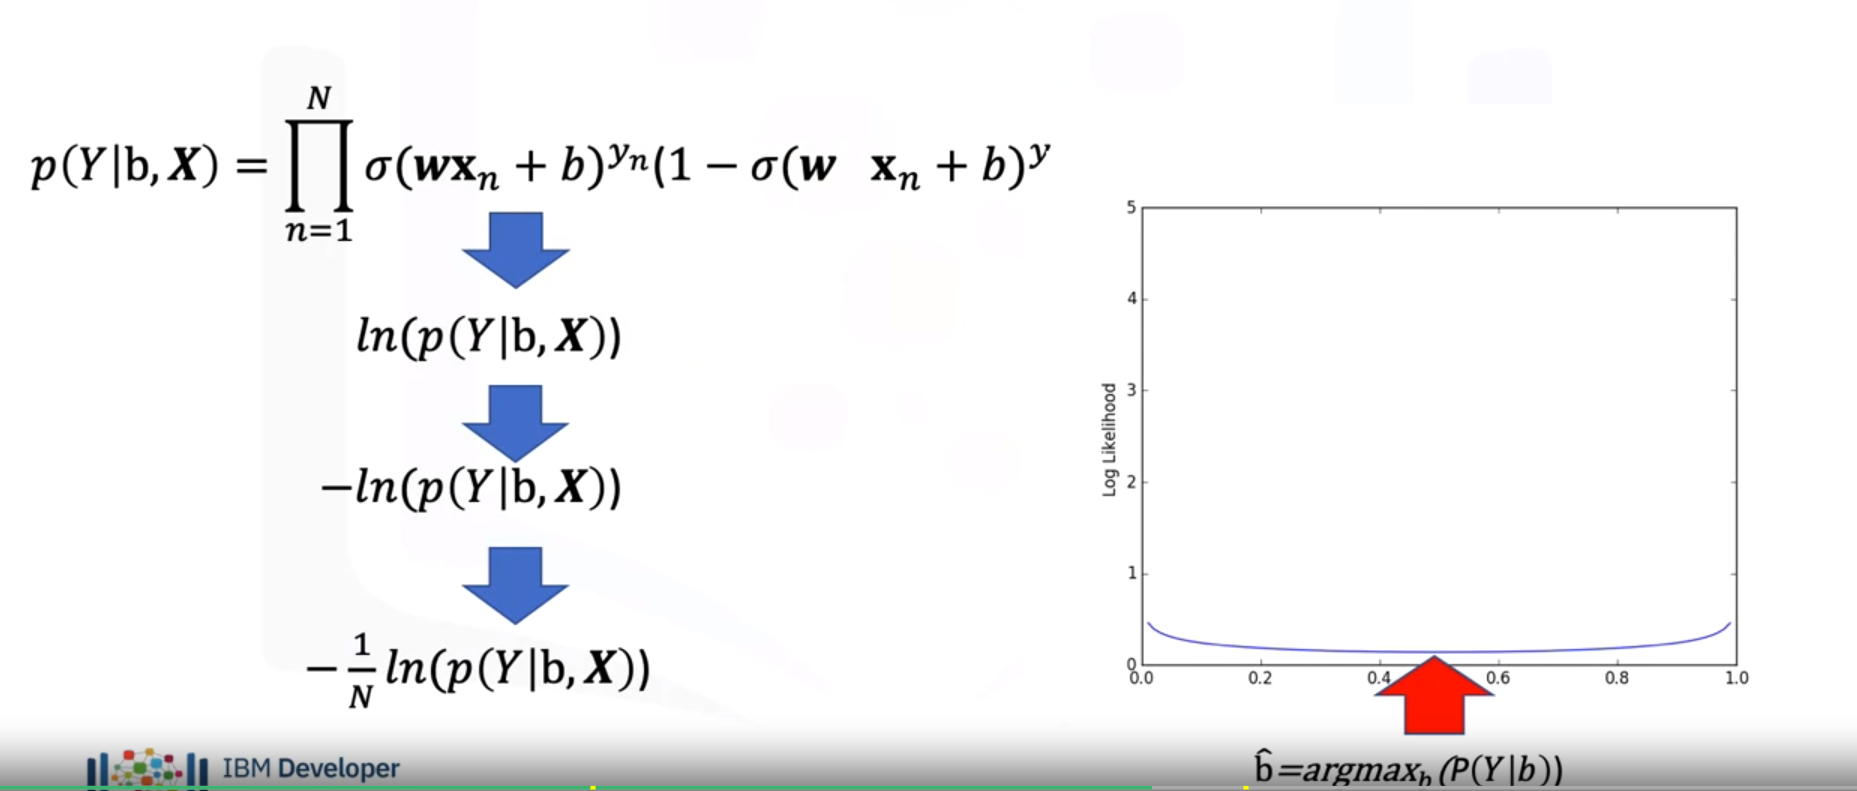

This cost function is known as cross entropy:
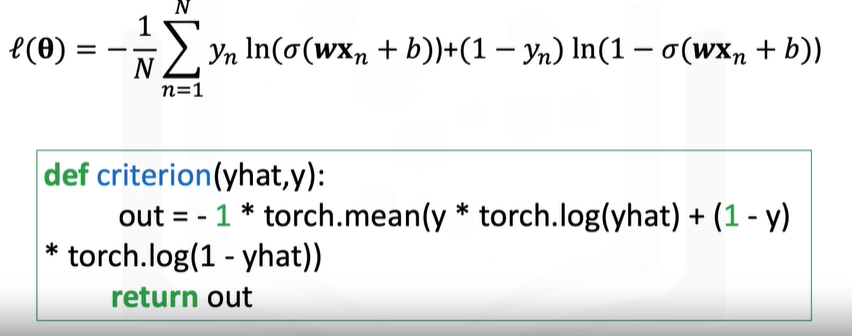

as you can see, the contours are all over the plot surface. ans it will noly be flat at the minimum.
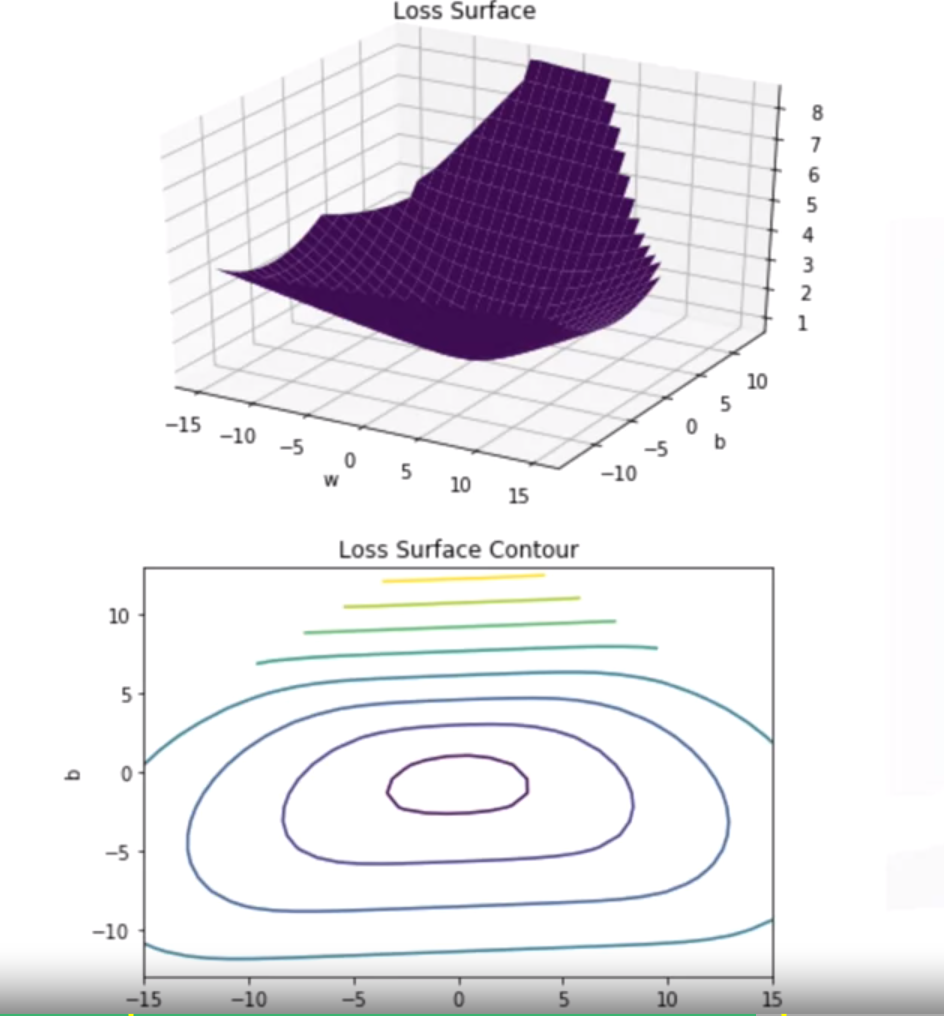

In [17]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

#set random seed
torch.manual_seed(0)

#create data class
class Data(Dataset):
    def __init__(self):
        self.x= torch.arange(-1,1,0.1).view(-1,1)
        self.y= torch.zeros(self.x.shape[0],1)
        self.y[self.x[:,0]>0.2]=1
        self.len= self.x.shape[0]
    
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

#create data object and dataloader object
data_set= Data()
trainloader= DataLoader(dataset=data_set, batch_size=1)

#create model
model= nn.Sequential(nn.Linear(1,1), nn.Sigmoid())

print(model.state_dict())
#set the weight and bias manually by replacing randomly initliazed parameters.
#model.state_dict()['0.weight'].data[0]= torch.tensor([[-5]])
#model.state_dict()['0.bias'].data[0]= torch.tensor([[-10]])

#loss function
criterion= nn.BCELoss()

#optimizer
optimizer= optim.SGD(model.parameters(), lr=0.01)




def train_model(epochs):  
    for epoch in range(epochs):
        for x,y in trainloader:
            yhat= model(x)
            loss= criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

train_model(100)

#make the predictions
yhat= model(data_set.x)
#get the actual sample of each class
label= yhat>0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))
        

OrderedDict([('0.weight', tensor([[-0.0075]])), ('0.bias', tensor([0.5364]))])
The accuracy:  tensor(1.)


## Softmax Function